<h3>Summary of new modules and functions introduced in this example</h3>
<ul><li>os.listdir() -- returns a list of files/folders found on computer</li>
    <li>pd.concat( takes list of data frames ) -- builds large dataframe from set of smaller</li>
    <li>df.value_counts() -- returns a list of unique values in each column; can be run from Series</li>
    <li>.index / .value -- useful properties for extracting named index results from count values results</li>
    <li>.str -- use on a column of string values in order to call python string functions from the series</li>
    <li>.tolist() -- useful for converting a Pandas array object into a Python list type</li>

In [23]:
import pandas as pd
import os
import matplotlib
import numpy as np

In [9]:
# try to find the set of files to process
filepaths = []

filenames = os.listdir("Files")
for file in filenames:
    filepaths.append("Files\\" + file)

In [29]:
dfs = []   # empty list of dataframes

for file in filepaths:      # file contains a string path to a report file
    df = pd.read_excel( file )    # open each file and create dataframe
    dfs.append(df)                # append each dataframe to our list of dataframes

df = pd.concat(dfs)     # concatenating each data frame into one BIG data frame
df.head()

,date,department,cost
0,01/01/2018,r&d,$58.02
1,01/01/2018,sales,$214.62
2,01/01/2018,purchasing,$284.07
3,01/01/2018,marketing,$486.35
4,01/01/2018,accounting,$8.01


In [30]:
# we need to filter the cost column to remove the '$' character
# and convert the type from string to float
df['cost'] = df['cost'].str.replace('$','').astype(float)

In [32]:
df.head()  # dollar sign is now removed and cost type is now float

,date,department,cost
0,01/01/2018,r&d,58.02
1,01/01/2018,sales,214.62
2,01/01/2018,purchasing,284.07
3,01/01/2018,marketing,486.35
4,01/01/2018,accounting,8.01


In [40]:
# use .value_counts() to extract the unqiue set of names found in the 'department' column
departments = df['department'].value_counts().index.tolist()

In [68]:
# for each department name, filter the dataframe on this department name,
#  then filter the 'cost' column and use .sum() to extract the total cost of this Series
for department in departments:
    print("%s - $%.2f" %(department, df[df['department'] == department]['cost'].sum()))

sales - $58537.48
r&d - $237205.29
accounting - $51627.28
purchasing - $320576.16
marketing - $132562.73


In [69]:
# In order to plot an x/y type graph, we need a numeric x column.  The 
# date column is giving us issues, so let's add a new column to our dataframe
# that contains increasing integer values (a substitute for time series data value)

# NOTE: We first tried in class to filter the dataframe into a new dataframe and then
# add a unique 'day' column, but were encountering errors.  Here we are just adding a
# unique column to the entire dataframe before filtering.
df['day'] = range(1,len(df)+1)

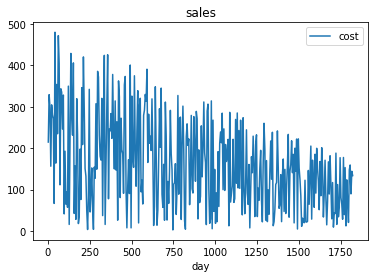

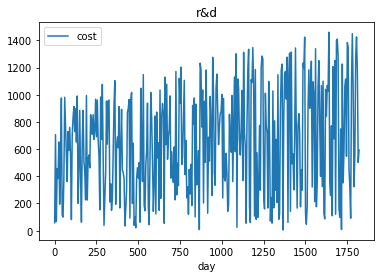

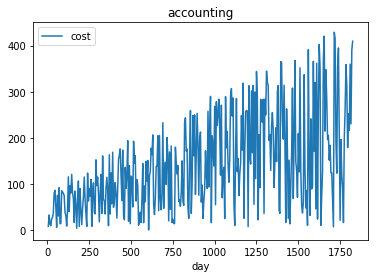

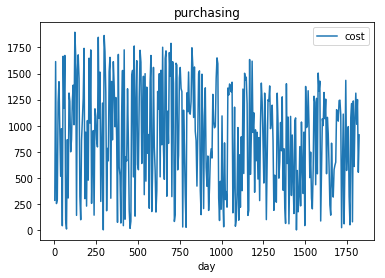

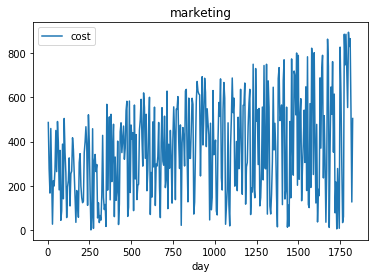

In [70]:
# for each department name we pulled above, plot a line plot of the cost vs. day value
# Do this to look at spending trends over the course of the year.
for department in departments:
    df[df['department']==department].plot.line(x = 'day', y = 'cost', title = department)

<h3>Summary of new modules and functions introduced in this example</h3>
<ul><li>os.listdir() -- returns a list of files/folders found on computer</li>
    <li>pd.concat( takes list of data frames ) -- builds large dataframe from set of smaller</li>
    <li>df.value_counts() -- returns a list of unique values in each column; can be run from Series</li>
    <li>.index / .value -- useful properties for extracting named index results from count values results</li>
    <li>.str -- use on a column of string values in order to call python string functions from the series</li>
    <li>.tolist() -- useful for converting a Pandas array object into a Python list type</li>